In [35]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.ensemble import AdaBoostClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read data into python env
data=pd.read_csv('/content/drive/MyDrive/datasets/Ensemble/train_loan.csv')

# 1.Data Familiarisation

In [4]:
# copy the datset into variable df
df=data.copy()

In [5]:
# check the shape of the data
df.shape

(614, 13)

The loan datset provided have 614 rows and 13 columns

In [7]:
# check teh dtypes of the dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 5 numeric columns & the rest are of object/ categorical type

In [8]:
# first 3 rows of the datset
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [9]:
# last 3 rows of the datset
df.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Note: We are predicting the loan status,Hence its a classification problem.

In [10]:
# check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Note:
1. There are some null values in the dataset. We need to handle the null values before modeling.
2. columns are of float64(4), int64(1), object(8)

In [11]:
# statistics summary of the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Note: There are outlier present in the dataset. we need to handle the outliers.

In [12]:
# columns of the dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
# check for the duplicated rows
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Note: No duplicated rows in the dataset.

#2. Missing value handling

In [14]:
# the count of null values in each column
df.isna().sum()[df.isna().sum()!=0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

Note:
1. There are seven columns containing the null values.
2. among those Dependents,LoanAmount,Loan_Amount_Term and Credit_History are numeric type
3. Since the dataset is amll , will go for imputation method rather than droping out the null values

In [15]:
Missing_value_columns=['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

In [16]:
# categorical columns in the dataset
df.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
# lets look at the unique values in each column
for i in Missing_value_columns:
  print(i,df[i].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Self_Employed ['No' 'Yes' nan]
LoanAmount [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 23

Note: From the above we can see that, we can use mode function to fill the null values in Gender, Married, Dependents,Self_Employed,Loan_Amount_Term,Credit_History.

In [18]:
# before that we will remove the + sign from Dependents column
df['Dependents']=df['Dependents'].apply(lambda x: str(x).replace('+',''))

In [19]:
# lets fill the columns with mode value except loan amount
for i in Missing_value_columns:
  if i !='LoanAmount':
    df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
# lets predict the load amount using RF Regressor

#### Encoding

In [20]:
# encode the below categorical features into nuemric using map function
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})

In [21]:
# the loan_ID is unique id column
# so it wont have any impact on the prediction
# lets drop the id column
df.drop('Loan_ID',axis=1,inplace=True)

In [22]:
# convert the Dependents colum to nuemric type
# it contains nan as string value. lets replace it with mode
# mode value of Dependents column is 0
# errors='coerce' parameter ensures that any non-convertible values (such as 'nan' or other non-numeric strings) are converted to NaN
# then we can use fillna methos on that column
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce').fillna(0).astype(int)


In [23]:
# lets do onehot encoding for Education and Property_Area
df_num=pd.get_dummies(df,drop_first=True,dtype=int)

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,Graduate,0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
# Lets split the data into dependent & independent feature
test=df_num[df_num['LoanAmount'].isna()]
train=df_num[df_num['LoanAmount'].notna()]

x_train=train.drop('LoanAmount',axis=1)
y_train=train['LoanAmount']

x_test=test.drop('LoanAmount',axis=1)
y_test=test['LoanAmount']

# lets fit the regressor model & fit the null values with predicted values
rf_reg=RandomForestRegressor(random_state=42)
rf_reg.fit(x_train,y_train)
y_pred=rf_reg.predict(x_test)

In [26]:
df_num.loc[df_num['LoanAmount'].isna(), 'LoanAmount'] = y_pred

In [27]:
# lets check the null values in df
df_num.isna().sum()

Gender                     0
Married                    0
Dependents                 0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Education_Not Graduate     0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

Note: null values has been handled

# Outlier detection & Handling

In [28]:
# we need to chekc the outliers in continuous numeric column-ApplicantIncome,CoapplicantIncome,LoanAmount

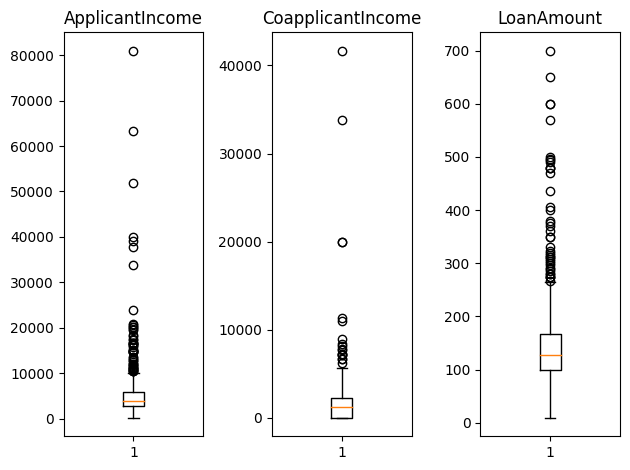

In [29]:
# lets plot the boxplot to see the outliers
plt.subplot(1,3,1)
plt.title('ApplicantIncome')
plt.boxplot(df_num['ApplicantIncome'])
plt.subplot(1,3,2)
plt.title('CoapplicantIncome')
plt.boxplot(df_num['CoapplicantIncome'])
plt.subplot(1,3,3)
plt.title('LoanAmount')
plt.boxplot(df_num['LoanAmount'])
plt.tight_layout()
plt.show()

In [30]:
# lets fill the outliers using Inter Quartile range
# Lets do the transformation
cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for i in cols:
    Q1=df[i].quantile(0.25)
    Q2=df[i].quantile(0.50)
    Q3=df[i].quantile(0.75)

    IQR=Q3-Q1

    upper=Q3 + (1.5*IQR)
    lower=Q1 -(1.5*IQR)

    df_num[i] =np.where(df_num[i]>upper,upper,np.where(df_num[i]<lower,lower,df_num[i]))

Note: Outliers has been removed

#  Perform different Ensemble Learning techniques in the given dataset

In [ ]:
# ensemble techniques are of 4 types
# They are Bagging, Boosting, Stacking and Maxvoting
# for Bagging- we can use Random Forest. Its emsemble model based on bagging algorithm
# For Bossting- we can use Gradient bossting, AdaBoost,Catboost

In [31]:
# install catboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.7 MB/s eta 0:00:00


In [32]:
# import
from catboost import CatBoostClassifier

In [33]:
# split the datset into x & y
x=df_num.drop('Loan_Status_Y',axis=1)
y=df_num.Loan_Status_Y

# split into train & test set
x_train,x_test,y_train,y_test=train_test_split(x.values,y,test_size=0.2,random_state=42)

In [36]:
# fit the data to the model & make prediction
models={'RF':RandomForestClassifier(random_state=42),'XGB':XGBClassifier(),'catboost':CatBoostClassifier(verbose=0),'AdaBoost':AdaBoostClassifier(n_estimators=10)}
for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(name+'-Accuracy:{:.2f}'.format(accuracy_score(y_pred,y_test))+'-F1_score:{:.2f}'.format(f1_score(y_pred,y_test)))

RF-Accuracy:0.78-F1_score:0.85
XGB-Accuracy:0.78-F1_score:0.85
catboost-Accuracy:0.79-F1_score:0.86
AdaBoost-Accuracy:0.78-F1_score:0.85


Note:
1. all the ensemble models are performed better on this dataset
2. Catboost score is higher compared to rest of the models
3. can choose the catboost model for prediction on unseen data

#Scaling

In [37]:
# check the scaling has any impact on the model performance
from sklearn.preprocessing import StandardScaler,MinMaxScaler

st_scaler=StandardScaler()
min_max=MinMaxScaler()

x_train_st=st_scaler.fit_transform(x_train)
x_test_st=st_scaler.fit_transform(x_test)

x_train_mm=min_max.fit_transform(x_train)
x_test_mm=min_max.fit_transform(x_test)


In [38]:
# standard scaling
for name,model in models.items():
  model.fit(x_train_st,y_train)
  y_pred=model.predict(x_test_st)
  print(name+'-Accuracy:{:.2f}'.format(accuracy_score(y_pred,y_test))+'-F1_score:{:.2f}'.format(f1_score(y_pred,y_test)))

RF-Accuracy:0.80-F1_score:0.87
XGB-Accuracy:0.74-F1_score:0.81
catboost-Accuracy:0.78-F1_score:0.85
AdaBoost-Accuracy:0.76-F1_score:0.84


In [39]:
# Minmax scaling
for name,model in models.items():
  model.fit(x_train_mm,y_train)
  y_pred=model.predict(x_test_mm)
  print(name+'-Accuracy:{:.2f}'.format(accuracy_score(y_pred,y_test))+'-F1_score:{:.2f}'.format(f1_score(y_pred,y_test)))

RF-Accuracy:0.76-F1_score:0.84
XGB-Accuracy:0.68-F1_score:0.76
catboost-Accuracy:0.77-F1_score:0.85
AdaBoost-Accuracy:0.75-F1_score:0.82


Note: In this problem, scaling doesn't have any great impact on the model's score.